In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/System-Threat-Forecaster/sample_submission.csv
/kaggle/input/System-Threat-Forecaster/train.csv
/kaggle/input/System-Threat-Forecaster/test.csv


In [2]:
df = pd.read_csv('/kaggle/input/System-Threat-Forecaster/train.csv')
pf=pd.read_csv('/kaggle/input/System-Threat-Forecaster/test.csv')

In [3]:
train_data=df.copy()
df1=df.copy()
df2=df.copy()
test_data=pf.copy()
pf1=pf.copy()

In [5]:
df.shape

(100000, 76)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 76 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   MachineID                           100000 non-null  object 
 1   ProductName                         100000 non-null  object 
 2   EngineVersion                       100000 non-null  object 
 3   AppVersion                          100000 non-null  object 
 4   SignatureVersion                    100000 non-null  object 
 5   IsBetaUser                          100000 non-null  int64  
 6   RealTimeProtectionState             99934 non-null   float64
 7   IsPassiveModeEnabled                100000 non-null  int64  
 8   AntivirusConfigID                   99924 non-null   float64
 9   NumAntivirusProductsInstalled       99924 non-null   float64
 10  NumAntivirusProductsEnabled         99924 non-null   float64
 11  HasTpm                     

In [7]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 75 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   MachineID                           10000 non-null  object 
 1   ProductName                         10000 non-null  object 
 2   EngineVersion                       10000 non-null  object 
 3   AppVersion                          10000 non-null  object 
 4   SignatureVersion                    10000 non-null  object 
 5   IsBetaUser                          10000 non-null  int64  
 6   RealTimeProtectionState             9991 non-null   float64
 7   IsPassiveModeEnabled                10000 non-null  int64  
 8   AntivirusConfigID                   9998 non-null   float64
 9   NumAntivirusProductsInstalled       9998 non-null   float64
 10  NumAntivirusProductsEnabled         9998 non-null   float64
 11  HasTpm                              10000 

In [7]:
feature_list = train_data.columns[:-1].values
label = [train_data.columns[-1]]

print ("Feature list:", feature_list)
print ("Label:", label)

Feature list: ['MachineID' 'ProductName' 'EngineVersion' 'AppVersion' 'SignatureVersion'
 'IsBetaUser' 'RealTimeProtectionState' 'IsPassiveModeEnabled'
 'AntivirusConfigID' 'NumAntivirusProductsInstalled'
 'NumAntivirusProductsEnabled' 'HasTpm' 'CountryID' 'CityID' 'GeoRegionID'
 'LocaleEnglishNameID' 'PlatformType' 'Processor' 'OSVersion'
 'OSBuildNumber' 'OSProductSuite' 'OsPlatformSubRelease' 'OSBuildLab'
 'SKUEditionName' 'IsSystemProtected' 'AutoSampleSubmissionEnabled'
 'SMode' 'IEVersionID' 'FirewallEnabled' 'EnableLUA' 'MDC2FormFactor'
 'DeviceFamily' 'OEMNameID' 'OEMModelID' 'ProcessorCoreCount'
 'ProcessorManufacturerID' 'ProcessorModelID' 'PrimaryDiskCapacityMB'
 'PrimaryDiskType' 'SystemVolumeCapacityMB' 'HasOpticalDiskDrive'
 'TotalPhysicalRAMMB' 'ChassisType' 'PrimaryDisplayDiagonalInches'
 'PrimaryDisplayResolutionHorizontal' 'PrimaryDisplayResolutionVertical'
 'PowerPlatformRole' 'InternalBatteryNumberOfCharges' 'NumericOSVersion'
 'OSArchitecture' 'OSBranch' 'OSBuildNu

In [8]:
import pandas as pd
null_values = train_data.isnull().sum()

# Setting pandas display option to show all columns
pd.set_option('display.max_columns', None)  

# also setting the max rows to ensure full output 
pd.set_option('display.max_rows', None)  
print(null_values)


MachineID                               0
ProductName                             0
EngineVersion                           0
AppVersion                              0
SignatureVersion                        0
IsBetaUser                              0
RealTimeProtectionState                66
IsPassiveModeEnabled                    0
AntivirusConfigID                      76
NumAntivirusProductsInstalled          76
NumAntivirusProductsEnabled            76
HasTpm                                  0
CountryID                               0
CityID                                623
GeoRegionID                             0
LocaleEnglishNameID                     0
PlatformType                            0
Processor                               0
OSVersion                               0
OSBuildNumber                           0
OSProductSuite                          0
OsPlatformSubRelease                    0
OSBuildLab                              0
SKUEditionName                    

In [9]:
import pandas as pd

# Create a DataFrame to display unique value counts and data types
unique_counts = pd.DataFrame({
    "Feature": df.columns,
    "Unique Values": [df[col].nunique() for col in df.columns],
    "Dtype": [df[col].dtype for col in df.columns]
})

# Display the result
print(unique_counts)


                               Feature  Unique Values    Dtype
0                            MachineID          99835   object
1                          ProductName              2   object
2                        EngineVersion             37   object
3                           AppVersion             69   object
4                     SignatureVersion           2735   object
5                           IsBetaUser              1    int64
6              RealTimeProtectionState              6  float64
7                 IsPassiveModeEnabled              2    int64
8                    AntivirusConfigID           1976  float64
9        NumAntivirusProductsInstalled              5  float64
10         NumAntivirusProductsEnabled              5  float64
11                              HasTpm              2    int64
12                           CountryID            220    int64
13                              CityID          16047  float64
14                         GeoRegionID            239  

In [10]:
pd.set_option('display.max_columns', None)  
pd.set_option('display.max_rows', None) 
train_data.describe()

,IsBetaUser,RealTimeProtectionState,IsPassiveModeEnabled,AntivirusConfigID,NumAntivirusProductsInstalled,NumAntivirusProductsEnabled,HasTpm,CountryID,CityID,GeoRegionID,LocaleEnglishNameID,OSBuildNumber,OSProductSuite,IsSystemProtected,AutoSampleSubmissionEnabled,SMode,IEVersionID,FirewallEnabled,EnableLUA,OEMNameID,OEMModelID,ProcessorCoreCount,ProcessorManufacturerID,ProcessorModelID,PrimaryDiskCapacityMB,SystemVolumeCapacityMB,HasOpticalDiskDrive,TotalPhysicalRAMMB,PrimaryDisplayDiagonalInches,PrimaryDisplayResolutionHorizontal,PrimaryDisplayResolutionVertical,InternalBatteryNumberOfCharges,OSBuildNumberOnly,OSBuildRevisionOnly,OSInstallLanguageID,OSUILocaleID,IsPortableOS,IsFlightsDisabled,FirmwareManufacturerID,FirmwareVersionID,IsSecureBootEnabled,IsVirtualDevice,IsTouchEnabled,IsPenCapable,IsAlwaysOnAlwaysConnectedCapable,IsGamer,RegionIdentifier,target
count,100000.0,99934.000000,100000.000000,99924.000000,99924.000000,99924.000000,100000.000000,100000.000000,99377.000000,100000.000000,100000.000000,100000.000000,100000.000000,99924.000000,100000.0,99019.000000,99893.000000,99834.000000,99981.000000,99788.000000,99772.000000,99915.000000,99915.000000,99915.000000,9.989000e+04,9.989000e+04,100000.00000,99849.000000,99928.000000,99928.000000,99928.000000,9.948500e+04,100000.000000,100000.000000,99887.000000,100000.000000,100000.000000,99674.0,99624.000000,99666.000000,100000.000000,99980.000000,100000.000000,100000.000000,99866.000000,99441.000000,99441.000000,100000.000000
mean,0.0,6.848430,0.017620,47975.710440,1.326528,1.018264,0.996780,108.078790,81029.938587,169.741630,122.695100,15917.208720,578.403380,0.955326,0.0,0.000505,124.053848,0.980067,0.996569,2209.573265,238780.914154,4.011500,4.530711,2367.693069,5.158619e+05,3.819905e+05,0.08140,6132.087442,16.708674,1552.230416,898.253192,1.118069e+09,15990.596350,986.531360,14.519267,60.030870,0.000520,0.0,401.987613,32942.648044,0.495690,0.003841,0.128470,0.040580,0.058398,0.296668,7.875866,0.505250
std,0.0,1.015166,0.131566,13803.321533,0.520681,0.155291,0.056654,63.062151,48944.027074,89.188929,69.242252,1943.421132,247.240971,0.206588,0.0,0.022466,33.535395,0.139771,0.266669,1300.863891,71708.483379,2.033075,1.288050,837.822392,3.525624e+05,3.246240e+05,0.27345,4813.882548,6.031598,363.438980,213.695880,1.884682e+09,1810.756601,2971.429862,10.142233,44.715508,0.022798,0.0,221.318891,21151.970827,0.499984,0.061855,0.334614,0.197316,0.234496,0.456791,4.562533,0.499975
min,0.0,0.000000,0.000000,39.000000,1.000000,0.000000,0.000000,1.000000,7.000000,1.000000,1.000000,7601.000000,16.000000,0.000000,0.0,0.000000,39.000000,0.000000,0.000000,46.000000,22.000000,1.000000,1.000000,3.000000,1.228800e+04,1.088000e+04,0.00000,512.000000,5.300000,400.000000,300.000000,0.000000e+00,10240.000000,0.000000,1.000000,5.000000,0.000000,0.0,2.000000,121.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,0.0,7.000000,0.000000,49480.000000,1.000000,1.000000,1.000000,51.000000,36694.000000,89.000000,74.000000,16299.000000,256.000000,1.000000,0.0,0.000000,111.000000,1.000000,1.000000,1443.000000,189586.000000,2.000000,5.000000,1998.000000,2.441980e+05,1.208410e+05,0.00000,4096.000000,13.900000,1366.000000,768.000000,0.000000e+00,16299.000000,167.000000,8.000000,31.000000,0.000000,0.0,142.000000,13020.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000
50%,0.0,7.000000,0.000000,53447.000000,1.000000,1.000000,1.000000,97.000000,82373.000000,181.000000,88.000000,16299.000000,768.000000,1.000000,0.0,0.000000,135.000000,1.000000,1.000000,2102.000000,246528.000000,4.000000,5.000000,2503.000000,4.769400e+05,2.567655e+05,0.00000,4096.000000,15.500000,1366.000000,768.000000,0.000000e+00,16299.000000,285.000000,9.000000,34.000000,0.000000,0.0,500.000000,33066.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.000000,1.000000
75%,0.0,7.000000,0.000000,53447.000000,2.000000,1.000000,1.000000,162.000000,122835.000000,267.000000,182

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")

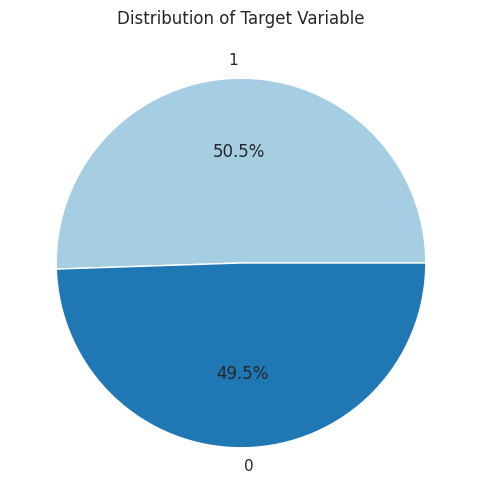

In [12]:
target_counts = df["target"].value_counts()

# Plot a pie chart
plt.figure(figsize=(8, 6))
plt.pie(target_counts, labels=target_counts.index, autopct='%1.1f%%', colors=plt.cm.Paired.colors)
plt.title("Distribution of Target Variable")
plt.show()

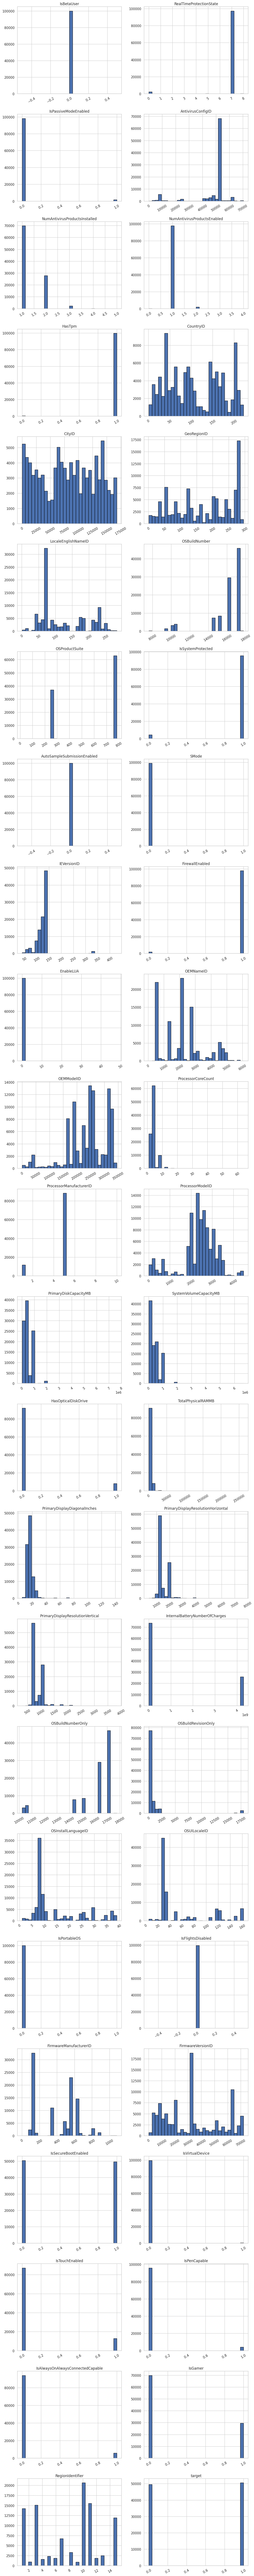

In [13]:

# Select numerical columns
num_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Determining number of rows needed (max 2 columns per row)
n_cols = 2  
n_rows = (len(num_cols) + n_cols - 1) // n_cols 


fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, 5 * n_rows))
axes = axes.flatten()  # Flattenening to 1D array for easier looping

# Plotting each histogram  sepearetely
for i, col in enumerate(num_cols):
    df[col].hist(ax=axes[i], bins=30, edgecolor='black')
    axes[i].set_title(col, fontsize=12)
    axes[i].tick_params(axis='x', rotation=30)  # Rotate x labels

# Hiding unused subplots
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])


plt.tight_layout()
plt.show()



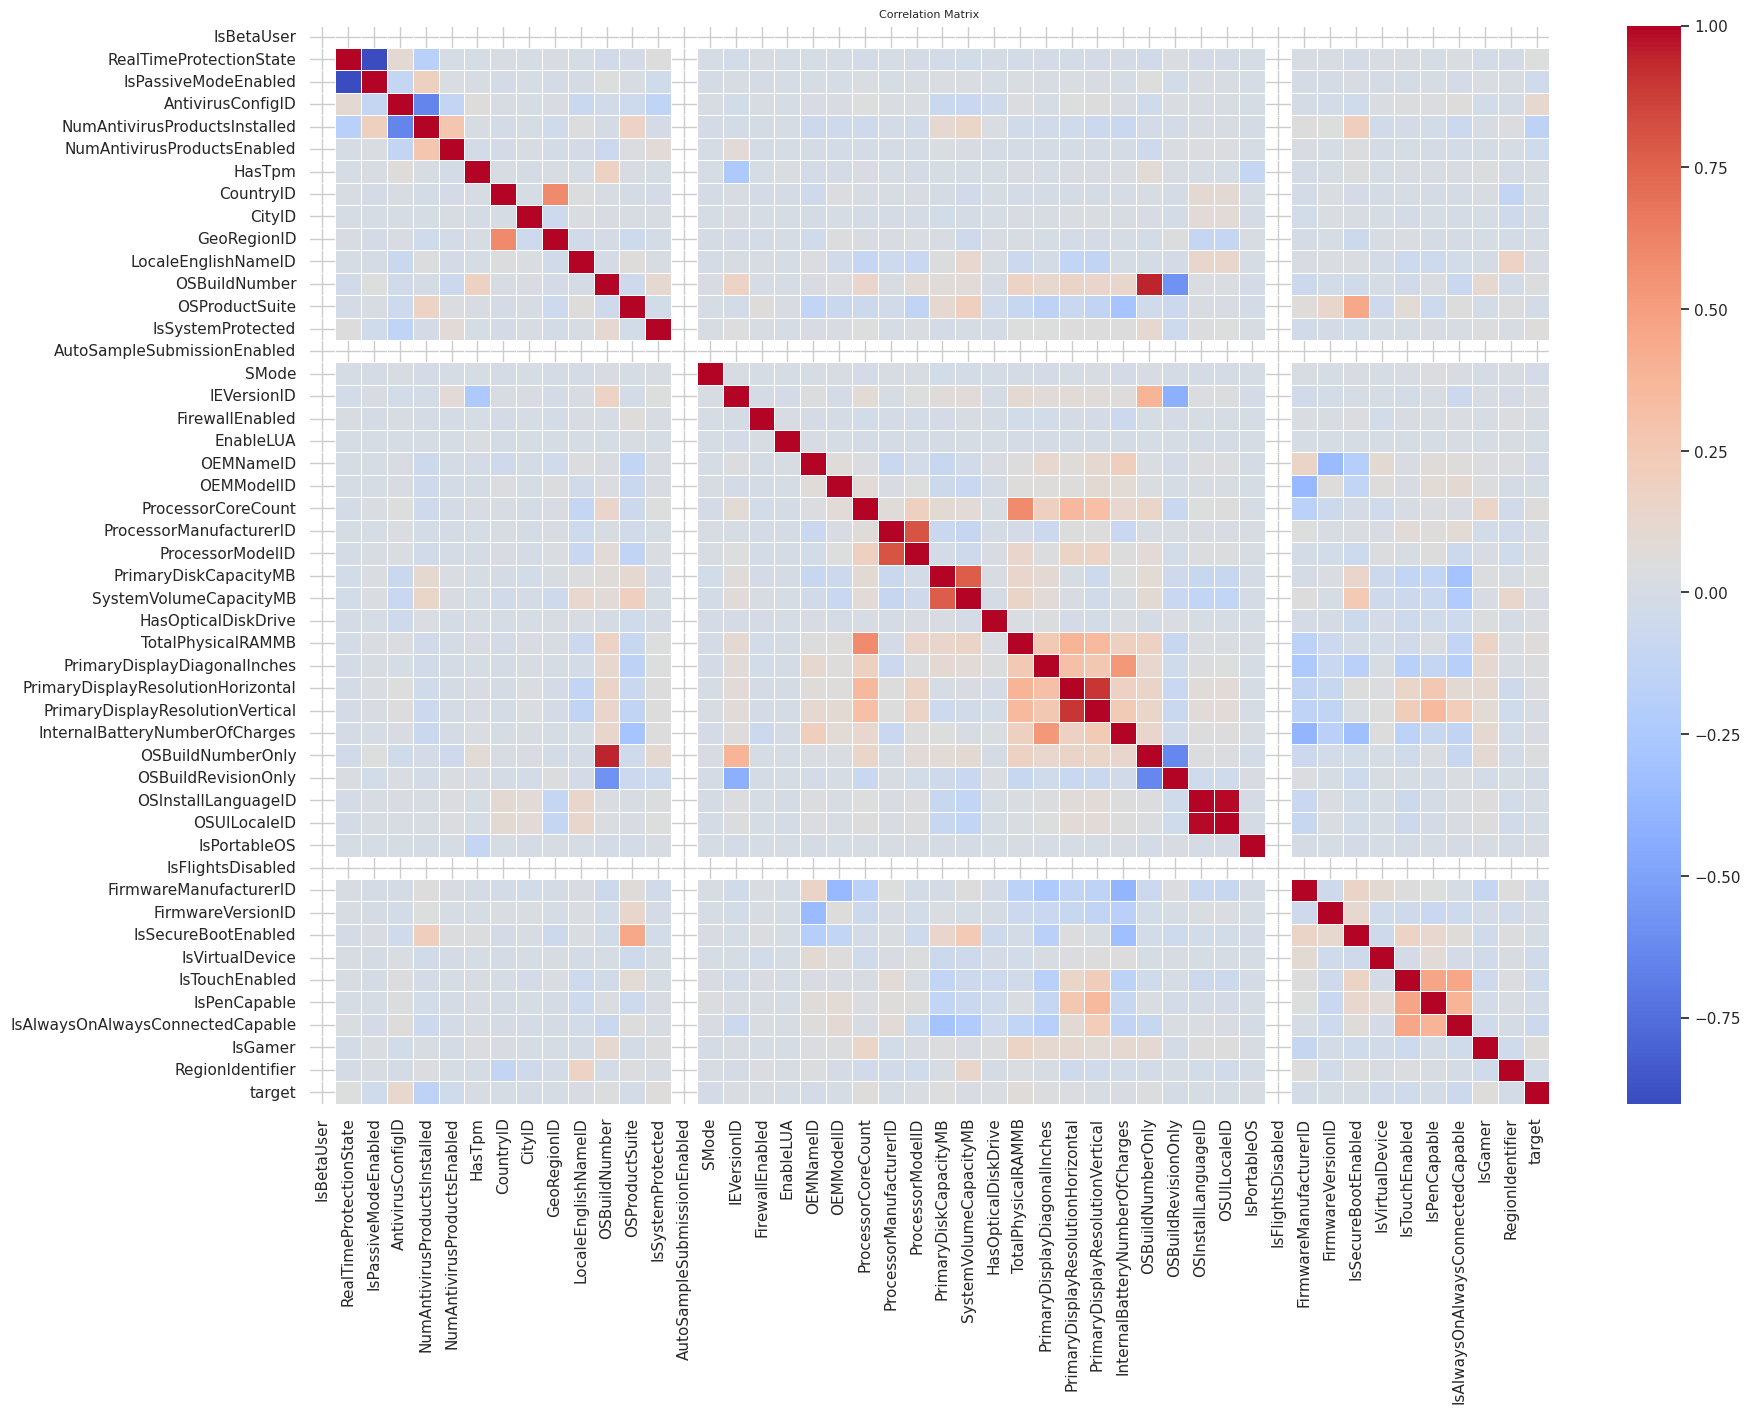

In [14]:
# Correlation matrix for numerical features
plt.figure(figsize=(20, 14))
corr_matrix = df[num_cols].corr()
sns.heatmap(corr_matrix, annot=False, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Matrix", fontsize=8)
plt.show()

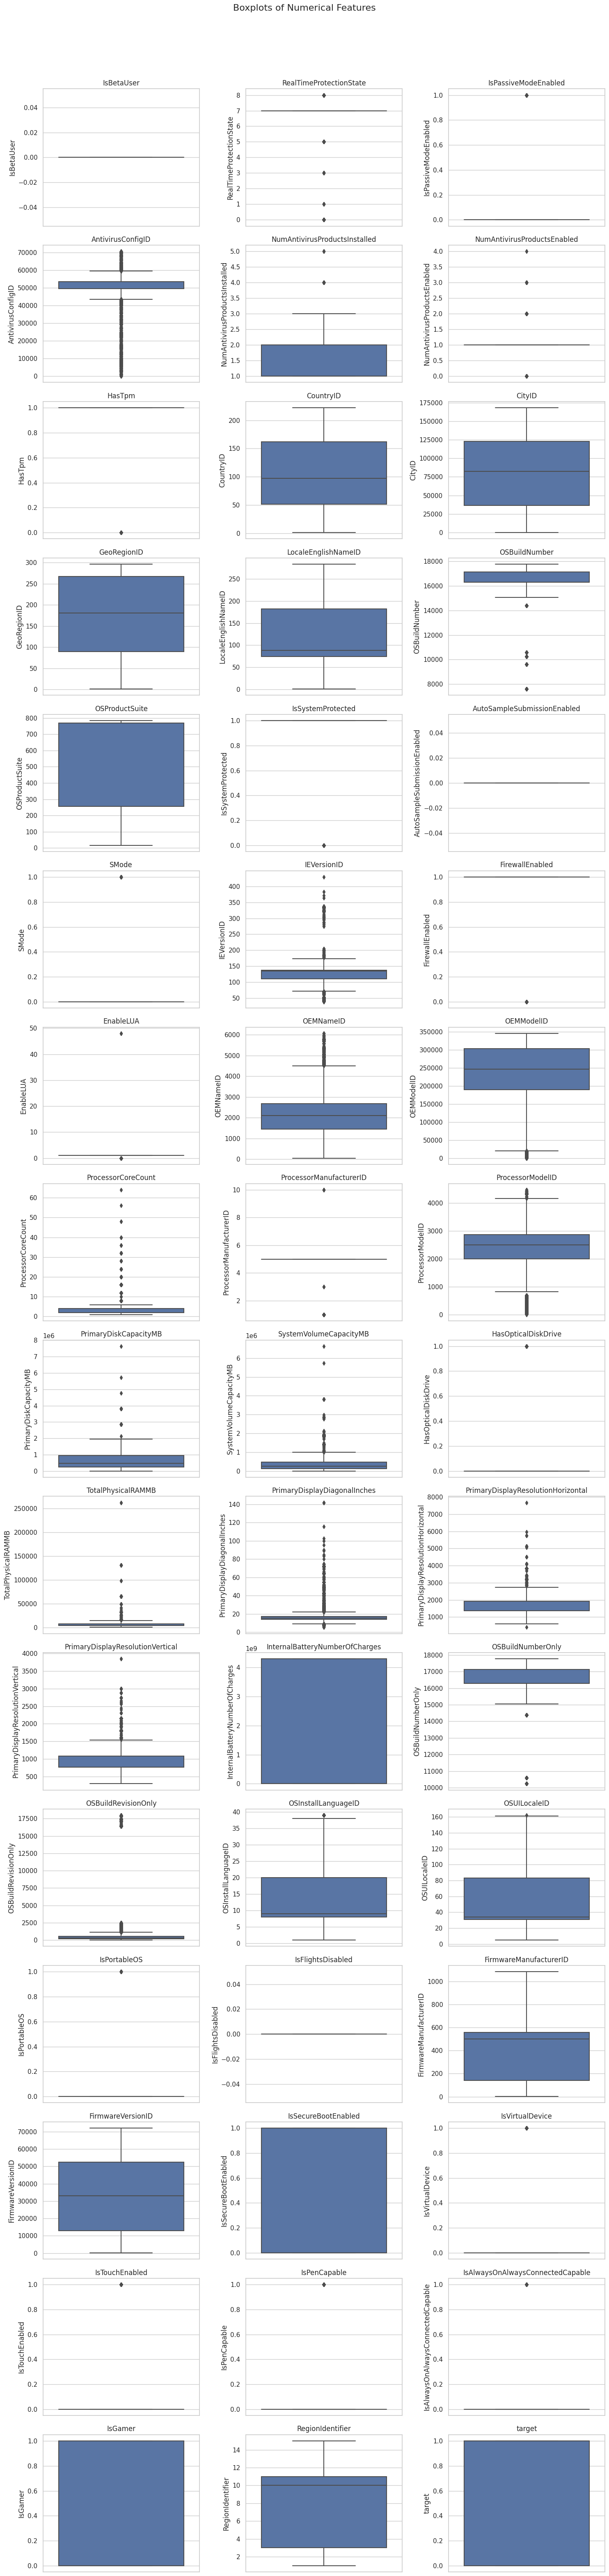

In [15]:
num_cols = df.select_dtypes(include=[np.number]).columns

# Setting up the grid dynamically
num_features = len(num_cols)  
cols = 3  # Setting number of columns per row
rows = (num_features // cols) + (num_features % cols > 0)  # Calculating required rows

plt.figure(figsize=(cols * 5, rows * 4))  # Adjusting figure size dynamically

for i, col in enumerate(num_cols):
    plt.subplot(rows, cols, i + 1)
    sns.boxplot(y=df[col])
    plt.title(col)

plt.suptitle("Boxplots of Numerical Features", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])  
plt.show()


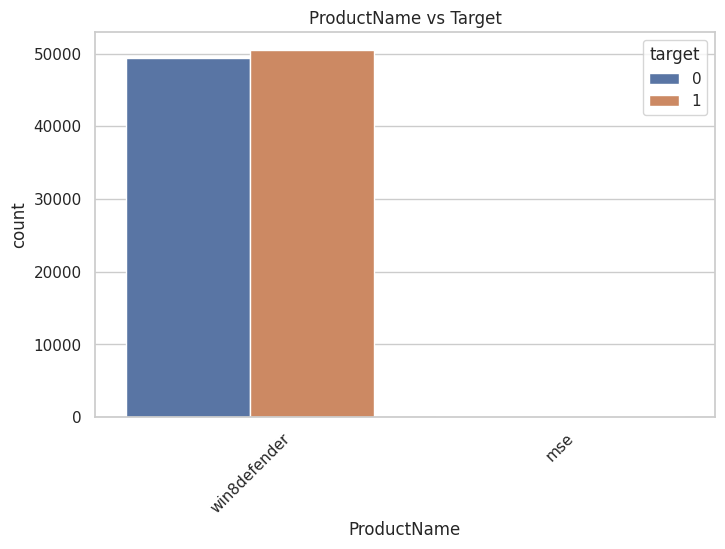

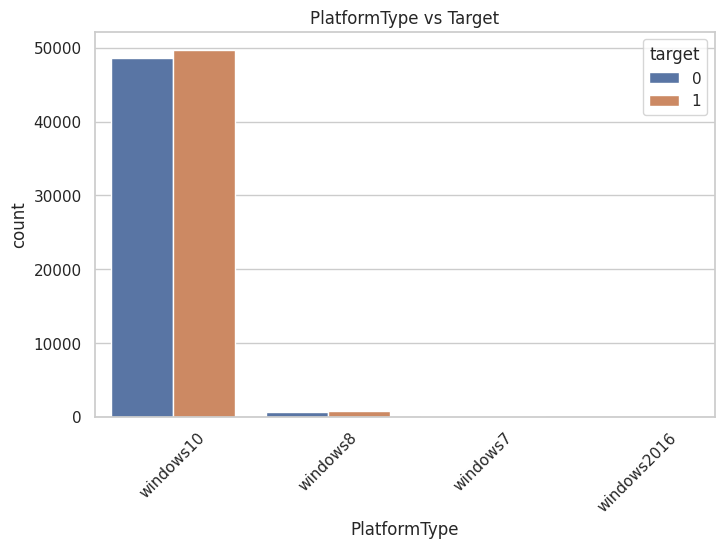

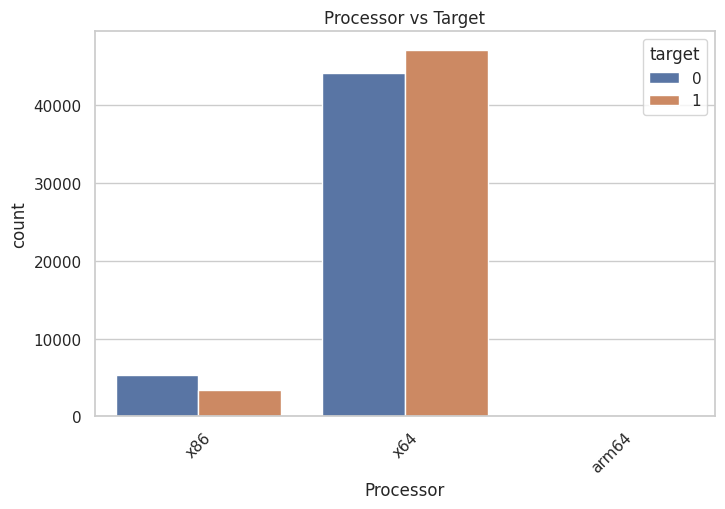

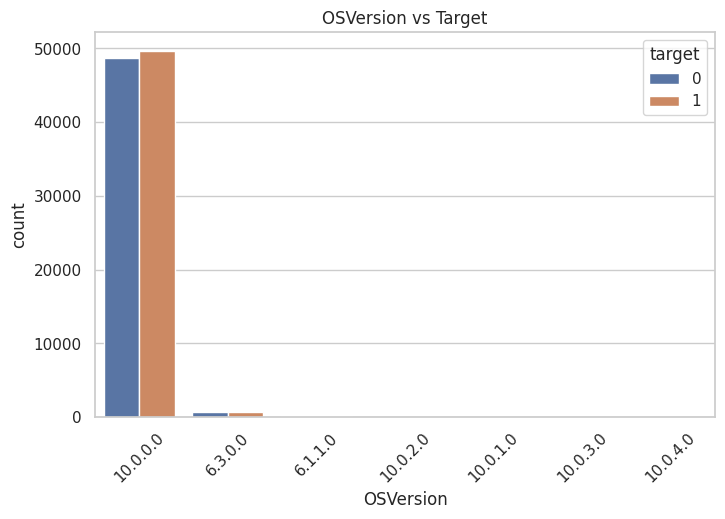

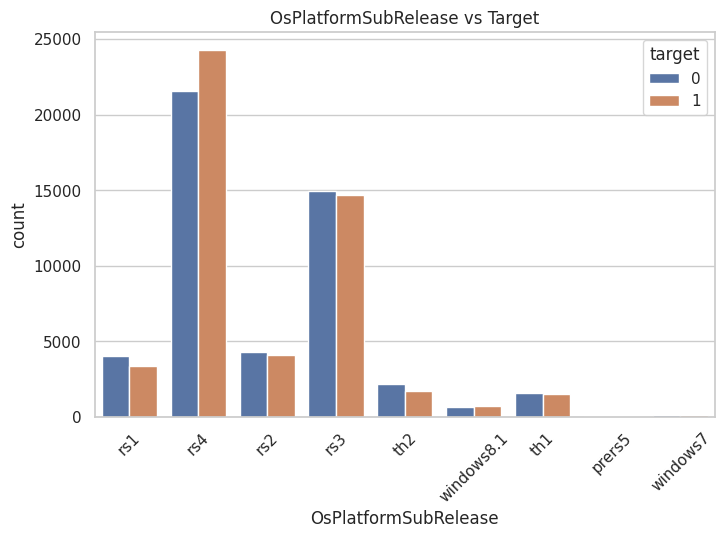

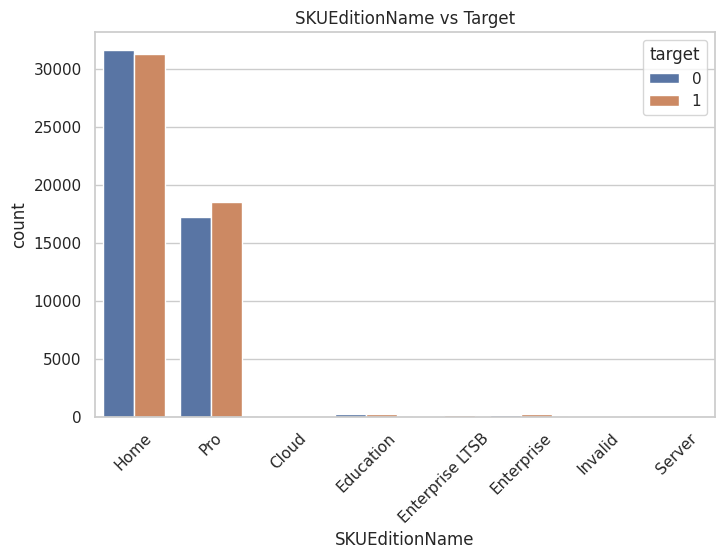

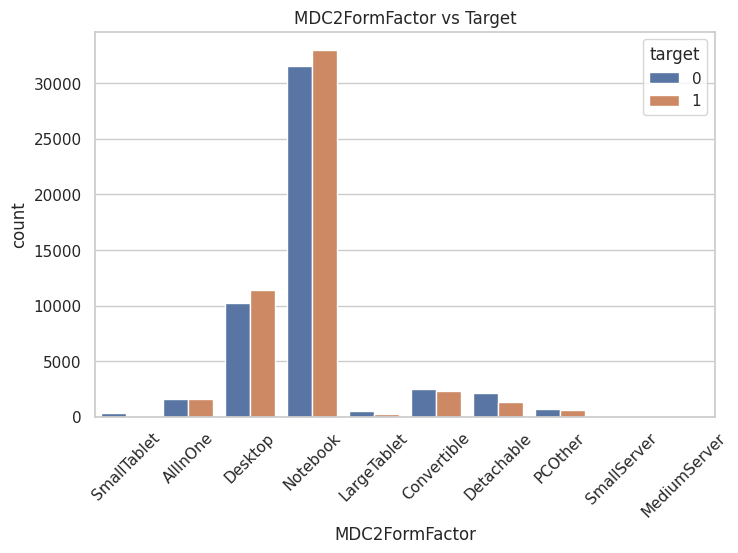

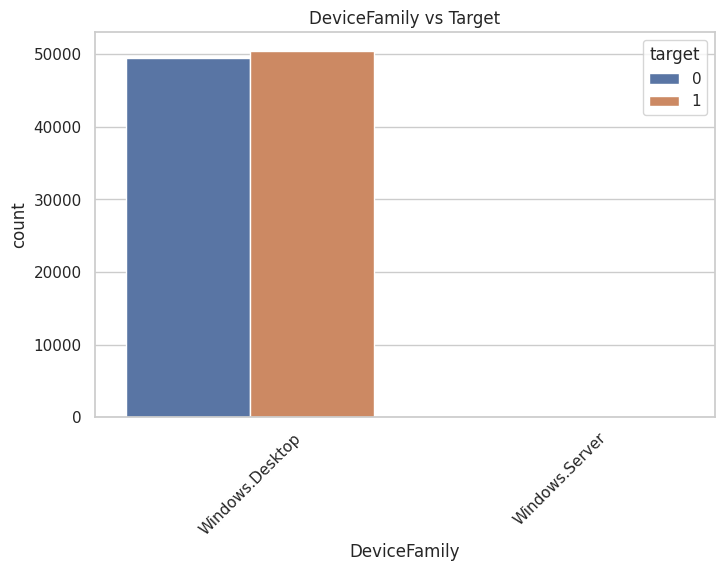

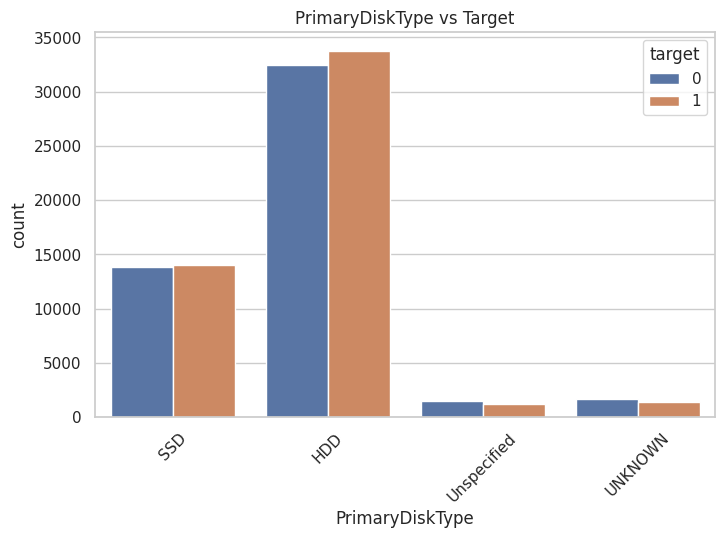

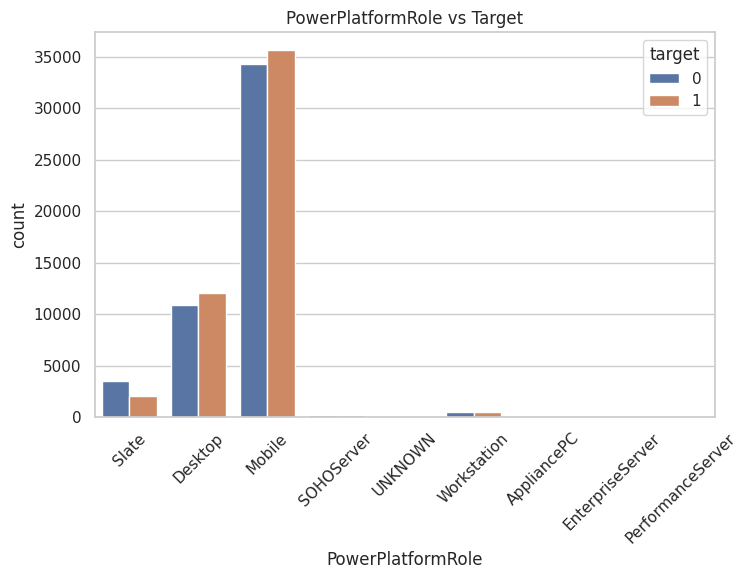

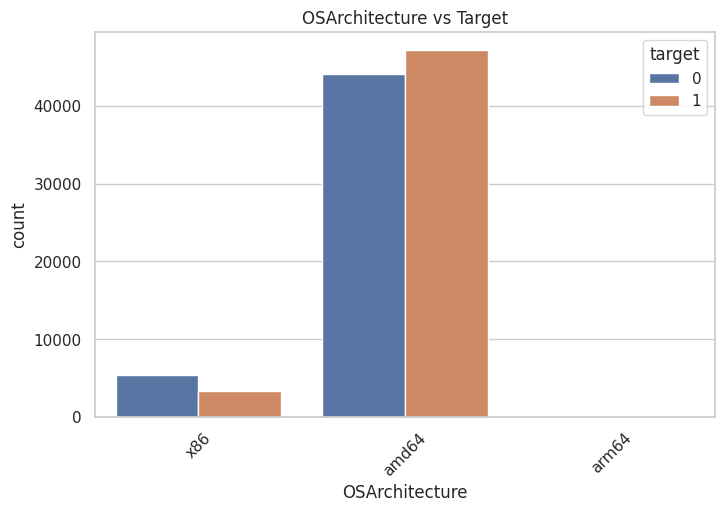

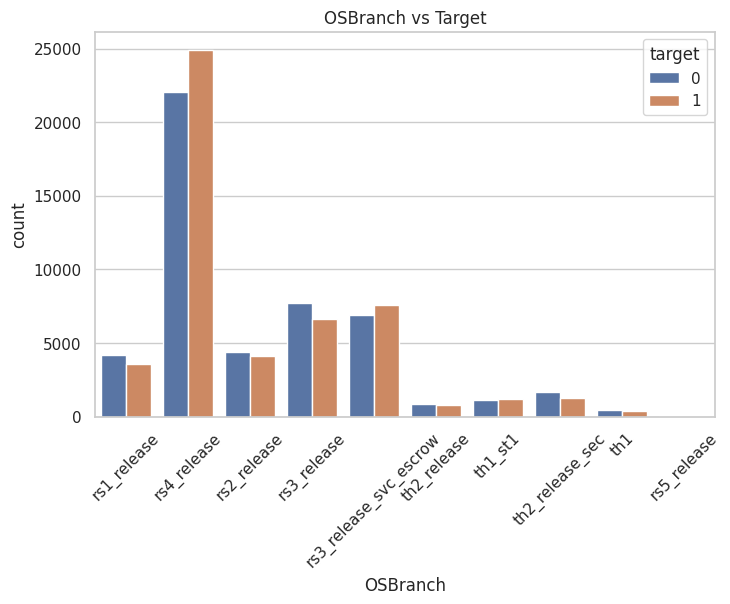

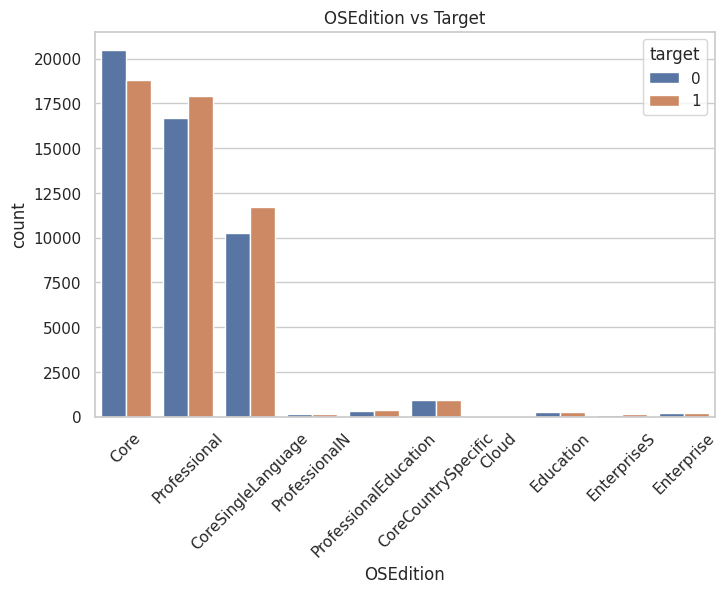

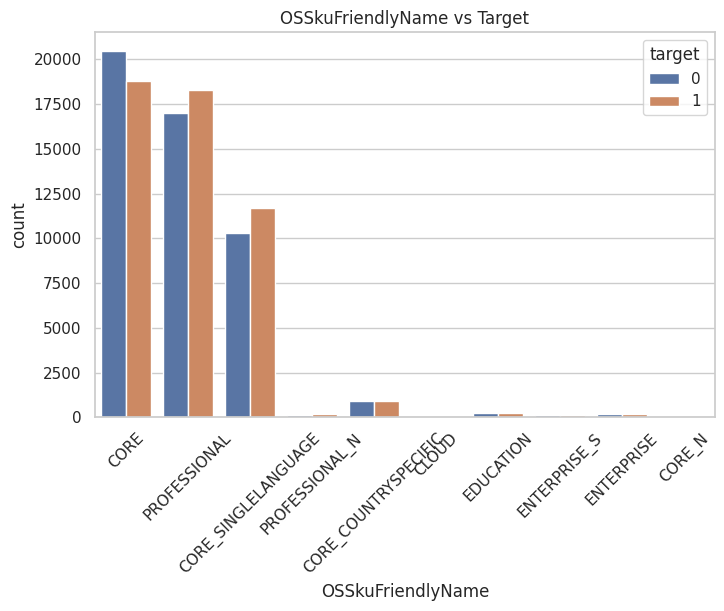

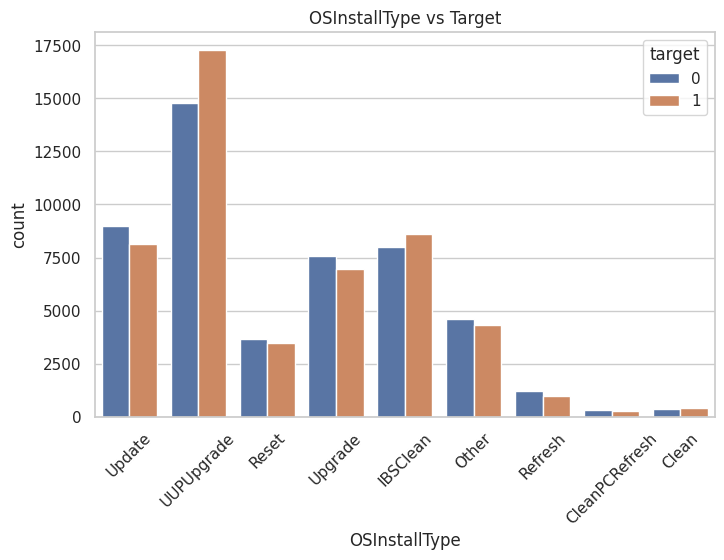

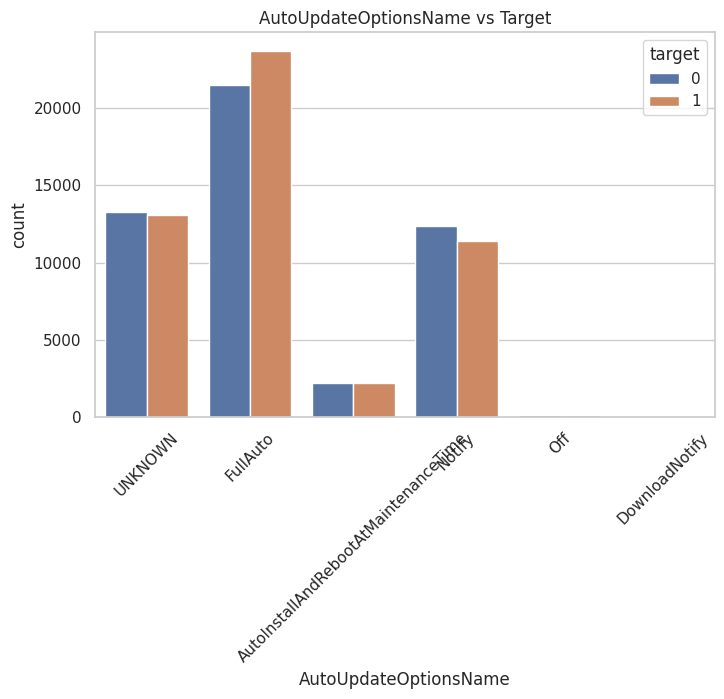

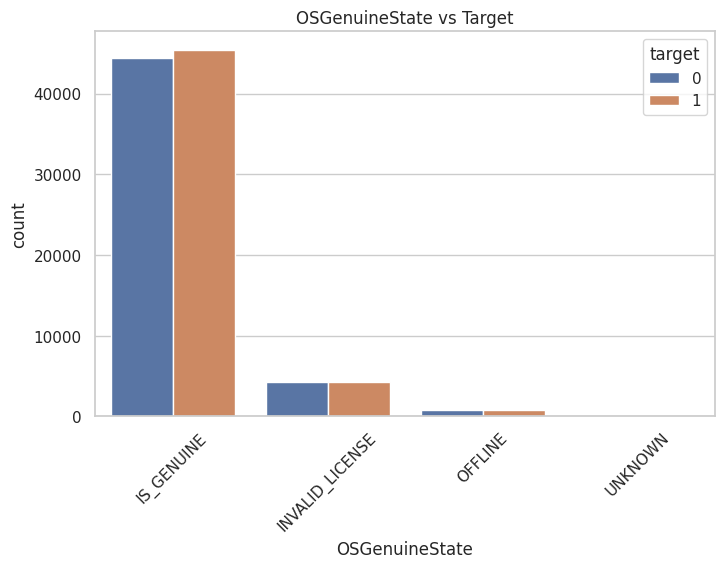

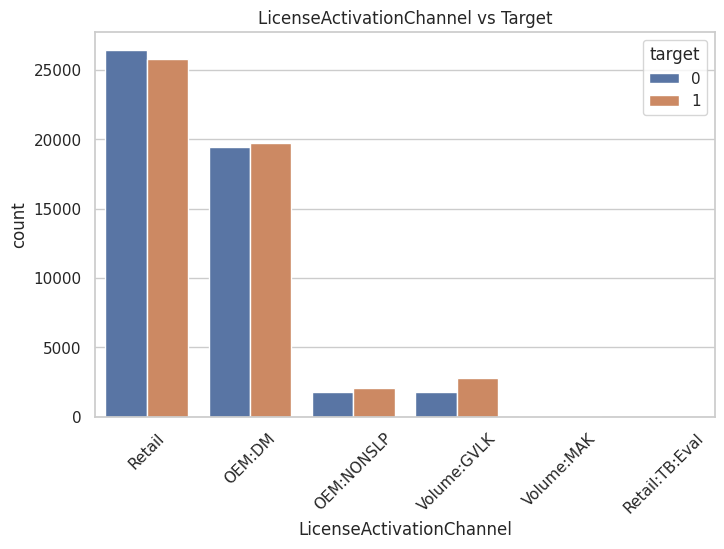

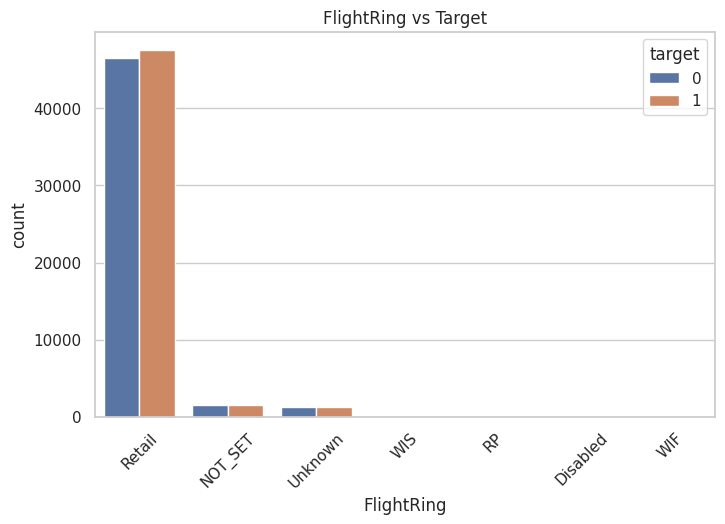

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

cat_cols = df.select_dtypes(include=['object']).columns

for col in cat_cols:
    if df[col].nunique() > 20:  # Skiping columns with too many unique values
        continue  

    plt.figure(figsize=(8, 5))
    top_categories = df[col].value_counts().index[:10]  # Selecting top 10 categories
    sns.countplot(data=df[df[col].isin(top_categories)], x=col, hue="target")
    plt.xticks(rotation=45)
    plt.title(f"{col} vs Target")
    plt.show()


**Logistic Regression Baseline model**

Dataset size: (100000, 76)
Accuracy: 0.5183
Precision: 0.5262
Recall: 0.4847
F1 score: 0.5046
ROC AUC: 0.5283

Classification report:
              precision    recall  f1-score   support

           0       0.51      0.55      0.53      9878
           1       0.53      0.48      0.50     10122

    accuracy                           0.52     20000
   macro avg       0.52      0.52      0.52     20000
weighted avg       0.52      0.52      0.52     20000



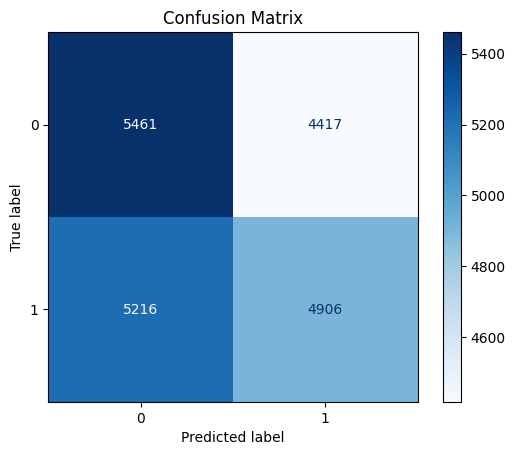

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.metrics import (accuracy_score, precision_score, recall_score, 
                             f1_score, roc_auc_score, confusion_matrix, 
                             ConfusionMatrixDisplay, classification_report)

# Copy dataset
df = df.copy()
X = df.drop(columns=['target'])
y = df['target']

# Encode target if categorical
if y.dtype == 'object' or y.dtype.name == 'category':
    le_target = LabelEncoder()
    y = le_target.fit_transform(y)

# Identify column types
cat_cols = X.select_dtypes(include=['object', 'category']).columns.tolist()
num_cols = X.select_dtypes(include=[np.number]).columns.tolist()

# Impute missing values
X[num_cols] = SimpleImputer(strategy='mean').fit_transform(X[num_cols])
X[cat_cols] = SimpleImputer(strategy='most_frequent').fit_transform(X[cat_cols])

# Label encode categorical columns
for col in cat_cols:
    X[col] = LabelEncoder().fit_transform(X[col])

# Train-test split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Logistic Regression
model = LogisticRegression(max_iter=500, solver='liblinear')
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_val)
y_proba = model.predict_proba(X_val)[:, 1] if len(np.unique(y)) == 2 else None

# Metrics
acc = accuracy_score(y_val, y_pred)
prec = precision_score(y_val, y_pred, average='binary' if y_proba is not None else 'macro')
rec = recall_score(y_val, y_pred, average='binary' if y_proba is not None else 'macro')
f1 = f1_score(y_val, y_pred, average='binary' if y_proba is not None else 'macro')

print(f"Dataset size: {df.shape}")
print(f"Accuracy: {acc:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall: {rec:.4f}")
print(f"F1 score: {f1:.4f}")

if y_proba is not None:
    roc_auc = roc_auc_score(y_val, y_proba)
    print(f"ROC AUC: {roc_auc:.4f}")

print("\nClassification report:")
print(classification_report(y_val, y_pred))

# Confusion matrix
cm = confusion_matrix(y_val, y_pred)
disp = ConfusionMatrixDisplay(cm)
disp.plot(cmap="Blues", values_format='d')
plt.title("Confusion Matrix")
plt.show()


In [24]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

# Selecting categorical columns
cat_df = df.select_dtypes(include=['object']).copy()

# Identifying categorical columns with ≤ 10 unique values
low_cardinality_cols = [col for col in cat_df.columns if cat_df[col].nunique() <= 10]

# Initializng OneHotEncoder with the correct parameter
encoder = OneHotEncoder(sparse_output=False, drop='first', handle_unknown='ignore')

# Applying encoding only to selected columns
encoded_array = encoder.fit_transform(cat_df[low_cardinality_cols])

# Converting encoded array to a DataFrame
encoded_df = pd.DataFrame(encoded_array, columns=encoder.get_feature_names_out(low_cardinality_cols))
cat_df = cat_df.drop(columns=low_cardinality_cols)
cat_df = pd.concat([cat_df.reset_index(drop=True), encoded_df], axis=1)

print("New number of columns in cat_df:", cat_df.shape[1])
encoded_df.head()


New number of columns in cat_df: 82


,ProductName_win8defender,PlatformType_windows2016,PlatformType_windows7,PlatformType_windows8,Processor_x64,Processor_x86,OSVersion_10.0.1.0,OSVersion_10.0.2.0,OSVersion_10.0.3.0,OSVersion_10.0.4.0,OSVersion_6.1.1.0,OSVersion_6.3.0.0,OsPlatformSubRelease_rs1,OsPlatformSubRelease_rs2,OsPlatformSubRelease_rs3,OsPlatformSubRelease_rs4,OsPlatformSubRelease_th1,OsPlatformSubRelease_th2,OsPlatformSubRelease_windows7,OsPlatformSubRelease_windows8.1,SKUEditionName_Education,SKUEditionName_Enterprise,SKUEditionName_Enterprise LTSB,SKUEditionName_Home,SKUEditionName_Invalid,SKUEditionName_Pro,SKUEditionName_Server,DeviceFamily_Windows.Server,PrimaryDiskType_SSD,PrimaryDiskType_UNKNOWN,PrimaryDiskType_Unspecified,PrimaryDiskType_nan,PowerPlatformRole_Desktop,PowerPlatformRole_EnterpriseServer,PowerPlatformRole_Mobile,PowerPlatformRole_PerformanceServer,PowerPlatformRole_SOHOServer,PowerPlatformRole_Slate,PowerPlatformRole_UNKNOWN,PowerPlatformRole_Workstation,OSArchitecture_arm64,OSArchitecture_x86,OSInstallType_CleanPCRefresh,OSInstallType_IBSClean,OSInstallType_Other,OSInstallType_Refresh,OSInstallType_Reset,OSInstallType_UUPUpgrade,OSInstallType_Update,OSInstallType_Upgrade,AutoUpdateOptionsName_DownloadNotify,AutoUpdateOptionsName_FullAuto,AutoUpdateOptionsName_Notify,AutoUpdateOptionsName_Off,AutoUpdateOptionsName_UNKNOWN,OSGenuineState_IS_GENUINE,OSGenuineState_OFFLINE,OSGenuineState_UNKNOWN,LicenseActivationChannel_OEM:NONSLP,LicenseActivationChannel_Retail,LicenseActivationChannel_Retail:TB:Eval,LicenseActivationChannel_Volume:GVLK,LicenseActivationChannel_Volume:MAK,FlightRing_NOT_SET,FlightRing_RP,FlightRing_Retail,FlightRing_Unknown,FlightRing_WIF,FlightRing_WIS
0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [25]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
target_column = 'target' 

X = df.drop(columns=[target_column])  
y = df[target_column]  
num_df = X.select_dtypes(include=['int64', 'float64']).copy()

# Initialization of MinMaxScaler
scaler = MinMaxScaler()

num_df_scaled = pd.DataFrame(scaler.fit_transform(num_df), columns=num_df.columns)
num_df_scaled.head()

,IsBetaUser,RealTimeProtectionState,IsPassiveModeEnabled,AntivirusConfigID,NumAntivirusProductsInstalled,NumAntivirusProductsEnabled,HasTpm,CountryID,CityID,GeoRegionID,LocaleEnglishNameID,OSBuildNumber,OSProductSuite,IsSystemProtected,AutoSampleSubmissionEnabled,SMode,IEVersionID,FirewallEnabled,EnableLUA,OEMNameID,OEMModelID,ProcessorCoreCount,ProcessorManufacturerID,ProcessorModelID,PrimaryDiskCapacityMB,SystemVolumeCapacityMB,HasOpticalDiskDrive,TotalPhysicalRAMMB,PrimaryDisplayDiagonalInches,PrimaryDisplayResolutionHorizontal,PrimaryDisplayResolutionVertical,InternalBatteryNumberOfCharges,OSBuildNumberOnly,OSBuildRevisionOnly,OSInstallLanguageID,OSUILocaleID,IsPortableOS,IsFlightsDisabled,FirmwareManufacturerID,FirmwareVersionID,IsSecureBootEnabled,IsVirtualDevice,IsTouchEnabled,IsPenCapable,IsAlwaysOnAlwaysConnectedCapable,IsGamer,RegionIdentifier
0,0.0,0.875,0.0,0.758087,0.00,0.25,1.0,0.226244,0.715838,0.328814,0.361702,0.668372,0.979167,1.0,0.0,0.0,0.151282,1.0,0.020833,0.085605,0.956684,0.047619,0.444444,0.412737,0.000360,0.000524,0.0,0.001957,0.019751,0.054945,0.276836,3.306195e-08,0.552040,0.123164,0.105263,0.133758,0.0,0.0,0.472710,0.303501,0.0,0.0,1.0,0.0,1.0,0.0,0.357143
1,0.0,0.875,0.0,0.758087,0.00,0.25,1.0,0.633484,0.671908,0.562712,0.801418,0.938103,0.312500,1.0,0.0,0.0,0.251282,1.0,0.020833,0.435838,0.072951,0.047619,0.444444,0.537207,0.123590,0.142265,1.0,0.013699,0.103146,0.164835,0.169492,1.000000e+00,0.916390,0.012684,0.210526,0.184713,0.0,0.0,0.579093,0.617299,1.0,0.0,0.0,0.0,0.0,0.0,0.642857
2,0.0,0.875,0.0,0.758087,0.00,0.25,1.0,0.226244,0.248598,0.328814,0.361702,0.938103,0.979167,1.0,0.0,0.0,0.251282,1.0,0.020833,0.496842,0.763517,0.047619,0.444444,0.606927,0.028437,0.032849,1.0,0.029354,0.136796,0.208791,0.220339,1.000000e+00,0.916390,0.015854,0.105263,0.133758,0.0,0.0,0.129510,0.129123,0.0,0.0,0.0,0.0,0.0,1.0,0.357143
3,0.0,0.875,0.0,0.658245,0.25,0.25,1.0,0.303167,0.116106,0.932203,0.258865,0.734304,0.979167,1.0,0.0,0.0,0.176923,1.0,0.020833,0.341755,0.702194,0.047619,0.444444,0.761341,0.248791,0.283996,0.0,0.029354,0.074616,0.132692,0.132203,0.000000e+00,0.641101,0.047285,0.157895,0.159236,0.0,0.0,0.510638,0.457677,1.0,0.0,0.0,0.0,0.0,0.0,0.785714
4,0.0,0.875,0.0,0.573831,0.25,0.25,1.0,0.190045,0.701364,0.176271,0.145390,0.938103,0.312500,1.0,0.0,0.0,0.251282,1.0,0.020833,0.435838,0.745107,0.015873,0.444444,0.965140,0.038453,0.006333,0.0,0.005871,0.107535,0.164835,0.169492,1.000000e+00,0.916390,0.015854,0.947368,0.974522,0.0,0.0,0.579093,0.182062,0.0,0.0,0.0,0.0,0.0,1.0,0.428571


**SGD baseline model**

In [26]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score

In [27]:
target_column = 'target'  

# Separation of features (X) and target (y)
X = df.drop(columns=[target_column])
y = df[target_column]

In [28]:
#preprocessing
imputer = SimpleImputer(strategy='most_frequent')
X_imputed = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)

cat_cols = X_imputed.select_dtypes(include=['object']).columns
encoder = OrdinalEncoder()
X_imputed[cat_cols] = encoder.fit_transform(X_imputed[cat_cols])

# Spliting the dataset (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.2, random_state=42)

In [29]:
# Training SGDClassifier
clf = SGDClassifier(random_state=42)
clf.fit(X_train, y_train)

# Prediction on test data
y_pred = clf.predict(X_test)

# Calculation of accuracy score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy Score on Test Data:", accuracy)


Accuracy Score on Test Data: 0.4951


In [30]:
gamer_column = 'IsGamer'  
malware_column = 'target'  

gamer_malware_count = train_data[(train_data[gamer_column] == 1) & (train_data[malware_column] == 1)].shape[0]

print(f"Number of systems owned by gamers where malware was detected: {gamer_malware_count}")

Number of systems owned by gamers where malware was detected: 16294


In [31]:
passive_mode_column = 'IsPassiveModeEnabled'
protection_state_column = 'RealTimeProtectionState'
filtered_df = train_data[train_data[passive_mode_column] == 1]
most_frequent_value = filtered_df[protection_state_column].mode().iloc[0]
print(f"The most frequent value of '{protection_state_column}' where '{passive_mode_column}' equals 1 is: {most_frequent_value}")

The most frequent value of 'RealTimeProtectionState' where 'IsPassiveModeEnabled' equals 1 is: 0.0


In [32]:
ram_column = 'TotalPhysicalRAMMB'
median_ram = train_data[ram_column].median()
print(f"The median value of '{ram_column}' is: {median_ram}")

The median value of 'TotalPhysicalRAMMB' is: 4096.0


**SGD**

In [33]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder, StandardScaler, MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score

In [34]:
target_column = 'target'

# Separation of features and target
X = train_data.drop(columns=[target_column])
y = train_data[target_column]

# Identification of numeric and categorical columns
numeric_cols = X.select_dtypes(include=['number']).columns
categorical_cols = X.select_dtypes(include=['object']).columns


In [35]:
# Preprocessing pipelines
num_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

cat_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1))
])

preprocessor = ColumnTransformer([
    ('num', num_transformer, numeric_cols),
    ('cat', cat_transformer, categorical_cols)
])

In [36]:
# preprocessing application
X_imputed = preprocessor.fit_transform(X)

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X_imputed)

# Feature Selection 
skb = SelectKBest(score_func=chi2, k=50)  # Adjust k if needed
X_selected = skb.fit_transform(X_scaled, y)

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

In [37]:
# Initialization of SGDClassifier
sgd_clf = SGDClassifier(random_state=42)

# Hyperparameter tuning with GridSearchCV
param_grid = {
    'loss': ['log_loss', 'hinge'],
    'alpha': [0.0001, 0.001, 0.01],
    'max_iter': [1000, 2000],
    'penalty': ['l2', 'elasticnet']
}

grid_search = GridSearchCV(sgd_clf, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Training of best SGD model
best_sgd = grid_search.best_estimator_
best_sgd.fit(X_train, y_train)

# Prediction & Evaluation
y_pred_sgd = best_sgd.predict(X_test)
accuracy_sgd = accuracy_score(y_test, y_pred_sgd)
print(best_sgd)
print(f"Optimized SGDClassifier Test Accuracy: {accuracy_sgd:.4f}")


SGDClassifier(alpha=0.001, loss='log_loss', random_state=42)
Optimized SGDClassifier Test Accuracy: 0.5941


**Naive Bayes**

In [38]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder, StandardScaler
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics import accuracy_score

In [39]:
target_column = 'target'  # Change this to the actual target column name

# Separating features (X) and target (y)
X = train_data.drop(columns=[target_column])
y = train_data[target_column]

# Identifing numeric and categorical columns
numeric_cols = X.select_dtypes(include=['number']).columns
categorical_cols = X.select_dtypes(include=['object']).columns

In [40]:
# preprocessing pipelines
num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean'))
])

cat_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1))
])

# Combining pipelines using ColumnTransformer
preprocessor = ColumnTransformer([
    ('num', num_pipeline, numeric_cols),
    ('cat', cat_pipeline, categorical_cols)
])

# Full pipeline with feature selection before scaling
full_pipeline = Pipeline([
    ('preprocessing', preprocessor),
    ('feature_selection', SelectKBest(score_func=chi2, k=32)),  # Ensure k <= number of features
    ('scaler', StandardScaler()),
    ('classifier', GaussianNB())
])

In [41]:
# Split dataset (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [42]:
# Training of model
full_pipeline.fit(X_train, y_train)

# Prediction on test data
y_pred = full_pipeline.predict(X_test)

# Calculation of accuracy score
accuracy = accuracy_score(y_test, y_pred)
print("Naive Bayes Accuracy Score on Test Data:", accuracy)


Naive Bayes Accuracy Score on Test Data: 0.5814


**LightGBM**

In [43]:
import pandas as pd
import numpy as np
import lightgbm as lgb
from lightgbm import LGBMClassifier, early_stopping
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder, MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import SelectKBest, chi2

In [44]:
target_column = 'target'

X = train_data.drop(columns=[target_column])
y = train_data[target_column]

# Identification of numeric and categorical columns
numeric_cols = X.select_dtypes(include=['number']).columns
categorical_cols = X.select_dtypes(include=['object']).columns


In [45]:
# Column Transformer:
num_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),  # Median imputation is better for robustness
    ('scaler', MinMaxScaler())  # MinMaxScaler ensures non-negative values for chi2
])

cat_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1))  # Avoid unseen category issues
])

preprocessor = ColumnTransformer([
    ('num', num_transformer, numeric_cols),
    ('cat', cat_transformer, categorical_cols)
])

# Transformations
X_preprocessed = preprocessor.fit_transform(X)

In [46]:
# SelectKBest (After MinMax Scaling)
skb = SelectKBest(score_func=chi2, k=62)  # Adjust k if needed
X_selected = skb.fit_transform(X_preprocessed, y)

# Split dataset
X_train, X_temp, y_train, y_temp = train_test_split(X_selected, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# callbacks for Early Stopping
callbacks = [early_stopping(stopping_rounds=50, verbose=True)]

In [47]:
# Hyperparameter Tuned LightGBM Model
lgbm_clf = LGBMClassifier(
    boosting_type='gbdt',
    num_leaves=40,               # Increased for better complexity handling
    max_depth=-1,
    learning_rate=0.05,          # Slightly increased for faster convergence
    n_estimators=700,            # More boosting rounds
    reg_alpha=0.3,               # Slightly higher L1 regularization
    reg_lambda=0.5,              # Increased L2 regularization
    colsample_bytree=0.9,        # More columns used per tree
    bagging_fraction=0.9,        # Helps generalization
    random_state=42
)


In [48]:
# Cross-validation 
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(lgbm_clf, X_train, y_train, cv=cv, scoring='accuracy')

print(f"Cross-validation Accuracy: {np.mean(cv_scores):.4f} ± {np.std(cv_scores):.4f}")

# Train with Early Stopping
lgbm_clf.fit(
    X_train, y_train,
    eval_set=[(X_val, y_val)],
    eval_metric='accuracy',
    callbacks=callbacks
)

# Prediction & Evaluation
y_pred = lgbm_clf.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred)

print(f"Final Test Accuracy: {test_accuracy:.4f}")


[LightGBM] [Warning] bagging_fraction is set=0.9, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9
[LightGBM] [Warning] bagging_fraction is set=0.9, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9
[LightGBM] [Info] Number of positive: 28356, number of negative: 27644
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.017278 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4453
[LightGBM] [Info] Number of data points in the train set: 56000, number of used features: 61
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.506357 -> initscore=0.025430
[LightGBM] [Info] Start training from score 0.025430
[LightGBM] [Warning] bagging_fraction is set=0.9, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9
[LightGBM] [Warning] bagging_fraction is set=0.9, subsample=1.0 will be ignored. Current valu

In [49]:
# # import pandas as pd
# import numpy as np
# import xgboost as xgb
# from sklearn.impute import SimpleImputer
# from sklearn.preprocessing import OrdinalEncoder, MinMaxScaler, PolynomialFeatures
# from sklearn.pipeline import Pipeline
# from sklearn.compose import ColumnTransformer
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import accuracy_score
# from sklearn.feature_selection import SelectKBest, mutual_info_classif

# # Load the dataset
# target_column = 'target'
# X = train_data.drop(columns=[target_column])
# y = train_data[target_column]

# # Ensure labels start from 0 and are integer
# y = y - y.min()
# y = y.astype(int)

# # Identify numeric and categorical columns
# numeric_cols = X.select_dtypes(include=['number']).columns
# categorical_cols = X.select_dtypes(include=['object']).columns

# # Column Transformer for Preprocessing
# num_transformer = Pipeline([
#     ('imputer', SimpleImputer(strategy='median')),
#     ('scaler', MinMaxScaler()),  # Kept MinMaxScaler for speed
#     ('poly', PolynomialFeatures(degree=1, include_bias=False))  # **Reverted degree=1**
# ])

# cat_transformer = Pipeline([
#     ('imputer', SimpleImputer(strategy='most_frequent')),
#     ('encoder', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1))
# ])

# preprocessor = ColumnTransformer([
#     ('num', num_transformer, numeric_cols),
#     ('cat', cat_transformer, categorical_cols)
# ])

# # Apply Transformations
# X_preprocessed = preprocessor.fit_transform(X)

# # Feature Selection using Mutual Information
# k_best = min(65, X_preprocessed.shape[1])  # **Reverted k=65**
# skb = SelectKBest(score_func=mutual_info_classif, k=k_best)
# X_selected = skb.fit_transform(X_preprocessed, y)

# # Split dataset
# X_train, X_temp, y_train, y_temp = train_test_split(X_selected, y, test_size=0.3, stratify=y, random_state=42)
# X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, stratify=y_temp, random_state=42)

# # Define XGBoost Model
# xgb_clf = xgb.XGBClassifier(
#     n_estimators=1000,  # **Reduced from 1200 to 1000 for speed**
#     max_depth=9,  # **Kept original max_depth=9**
#     learning_rate=0.025,
#     subsample=0.9,
#     colsample_bytree=0.8,
#     reg_alpha=0.2,
#     reg_lambda=0.5,
#     gamma=1,
#     min_child_weight=3,
#     random_state=42,
#     eval_metric='mlogloss',
#     objective="multi:softmax",
#     num_class=len(np.unique(y)),
#     early_stopping_rounds=50
# )

# # Train XGBoost Model
# xgb_clf.fit(
#     X_train, y_train,
#     eval_set=[(X_val, y_val)],
#     verbose=True
# )

# # Transform test data using the fitted preprocessor
# X_test_transformed = preprocessor.transform(test_data)

# # Apply feature selection transformation
# X_test_selected = skb.transform(X_test_transformed)

# # Make predictions
# test_predictions = xgb_clf.predict(X_test_selected).astype(int)

# # Prepare submission file
# submission = pd.DataFrame({
#     "id": test_data["id"] if "id" in test_data.columns else np.arange(len(test_data)),  
#     "target": test_predictions
# })

# # Save submission
# submission.to_csv("/kaggle/working/submission.csv", index=False)

# print("✅ Submission saved as '/kaggle/working/submission.csv'")


In [50]:
# # Transform test data using the trained preprocessor
# X_test_transformed = preprocessor.transform(test_data)

# # Apply the same feature selection transformation
# X_test_selected = skb.transform(X_test_transformed)

# # Make predictions on test set
# test_predictions = xgb_clf.predict(X_test_selected)

# # Ensure predictions are integers
# test_predictions = test_predictions.astype(int)

# # Create submission file
# submission = pd.DataFrame({
#     "id": test_data.index if "id" not in test_data.columns else test_data["id"],  
#     "target": test_predictions
# })

# # Save submission
# submission.to_csv("/kaggle/working/submission.csv", index=False)

# print("✅ Submission saved as '/kaggle/working/submission.csv'")


In [51]:
# X_test_transformed = preprocessor.transform(test_data)
# X_test_selected = skb.transform(X_test_transformed)

# test_predictions = lgbm_clf.predict(X_test_selected)
# submission = pd.DataFrame({"id": test_data.index, "target": test_predictions})
# submission.to_csv("/kaggle/working/submission.csv", index=False)
# print("Submission saved as '/kaggle/working/submission.csv'")

In [52]:
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder, MinMaxScaler, PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import SelectKBest, mutual_info_classif

# Load the dataset
target_column = 'target'
X = train_data.drop(columns=[target_column])
y = train_data[target_column]

# Ensure labels start from 0 and are integer
y = y - y.min()
y = y.astype(int)

# Identify numeric and categorical columns
numeric_cols = X.select_dtypes(include=['number']).columns
categorical_cols = X.select_dtypes(include=['object']).columns

# Column Transformer for Preprocessing
num_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', MinMaxScaler()),  # Kept MinMaxScaler for speed
    ('poly', PolynomialFeatures(degree=1, include_bias=False))  # **Reverted degree=1**
])

cat_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1))
])

preprocessor = ColumnTransformer([
    ('num', num_transformer, numeric_cols),
    ('cat', cat_transformer, categorical_cols)
])

# Apply Transformations
X_preprocessed = preprocessor.fit_transform(X)

# Feature Selection using Mutual Information
k_best = min(65, X_preprocessed.shape[1])  # **Reverted k=65**
skb = SelectKBest(score_func=mutual_info_classif, k=k_best)
X_selected = skb.fit_transform(X_preprocessed, y)

# Split dataset
X_train, X_temp, y_train, y_temp = train_test_split(X_selected, y, test_size=0.3, stratify=y, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, stratify=y_temp, random_state=42)

# Define XGBoost Model
xgb_clf = xgb.XGBClassifier(
    n_estimators=1000,  # **Reduced from 1200 to 1000 for speed**
    max_depth=9,  # **Kept original max_depth=9**
    learning_rate=0.025,
    subsample=0.9,
    colsample_bytree=0.8,
    reg_alpha=0.2,
    reg_lambda=0.5,
    gamma=1,
    min_child_weight=3,
    random_state=42,
    eval_metric='mlogloss',
    objective="multi:softmax",
    num_class=len(np.unique(y)),
    early_stopping_rounds=50
)

# Train XGBoost Model
xgb_clf.fit(
    X_train, y_train,
    eval_set=[(X_val, y_val)],
    verbose=True
)

# Transform test data using the fitted preprocessor
X_test_transformed = preprocessor.transform(test_data)

# Apply feature selection transformation
X_test_selected = skb.transform(X_test_transformed)

# Make predictions
test_predictions = xgb_clf.predict(X_test_selected).astype(int)

# Prepare submission file
submission = pd.DataFrame({
    "id": test_data["id"] if "id" in test_data.columns else np.arange(len(test_data)),  
    "target": test_predictions
})

# Save submission
submission.to_csv("/kaggle/working/submission.csv", index=False)

print("✅ Submission saved as '/kaggle/working/submission.csv'")


[0]	validation_0-mlogloss:0.69139
[1]	validation_0-mlogloss:0.68967
[2]	validation_0-mlogloss:0.68802
[3]	validation_0-mlogloss:0.68642
[4]	validation_0-mlogloss:0.68501
[5]	validation_0-mlogloss:0.68360
[6]	validation_0-mlogloss:0.68224
[7]	validation_0-mlogloss:0.68099
[8]	validation_0-mlogloss:0.67977
[9]	validation_0-mlogloss:0.67854
[10]	validation_0-mlogloss:0.67739
[11]	validation_0-mlogloss:0.67630
[12]	validation_0-mlogloss:0.67527
[13]	validation_0-mlogloss:0.67423
[14]	validation_0-mlogloss:0.67321
[15]	validation_0-mlogloss:0.67230
[16]	validation_0-mlogloss:0.67140
[17]	validation_0-mlogloss:0.67053
[18]	validation_0-mlogloss:0.66970
[19]	validation_0-mlogloss:0.66890
[20]	validation_0-mlogloss:0.66822
[21]	validation_0-mlogloss:0.66746
[22]	validation_0-mlogloss:0.66676
[23]	validation_0-mlogloss:0.66606
[24]	validation_0-mlogloss:0.66537
[25]	validation_0-mlogloss:0.66472
[26]	validation_0-mlogloss:0.66408
[27]	validation_0-mlogloss:0.66346
[28]	validation_0-mlogloss:0.6

In [53]:
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder, MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import SelectPercentile, mutual_info_classif

# ✅ Ensure 'target' column exists
target_column = 'target'
if target_column not in train_data.columns:
    raise ValueError("❌ Error: 'target' column is missing from train_data.")

X = train_data.drop(columns=[target_column])
y = train_data[target_column]

# ✅ Ensure labels start from 0
y = y - y.min()
y = y.astype(int)

# Identify numeric and categorical columns
numeric_cols = X.select_dtypes(include=['number']).columns.tolist()
categorical_cols = X.select_dtypes(include=['object']).columns.tolist()

# ✅ Replace Target Encoding with Ordinal Encoding
cat_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1))
])

# ✅ Numeric Pipeline
num_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', MinMaxScaler())
])

# ✅ Preprocessing Pipeline
preprocessor = ColumnTransformer([
    ('num', num_transformer, numeric_cols),
    ('cat', cat_transformer, categorical_cols)
])

# Apply Transformations
X_preprocessed = preprocessor.fit_transform(X)

# ✅ Feature Selection (Keeping Top 80%)
feature_selector = SelectPercentile(score_func=mutual_info_classif, percentile=80)
X_selected = feature_selector.fit_transform(X_preprocessed, y)

# ✅ Train-Test Split
X_train, X_temp, y_train, y_temp = train_test_split(X_selected, y, test_size=0.3, stratify=y, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, stratify=y_temp, random_state=42)

# ✅ Optimized XGBoost Model
xgb_clf = xgb.XGBClassifier(
    n_estimators=700,  # ✅ Reduced for faster training
    max_depth=9,  
    learning_rate=0.03,  # ✅ Slightly increased
    subsample=0.85,  
    colsample_bytree=0.9,  
    reg_alpha=0.1,  
    reg_lambda=0.4,  
    gamma=1,  
    min_child_weight=3,  
    random_state=42,
    eval_metric='mlogloss',
    objective="multi:softmax",
    num_class=len(np.unique(y)),
    early_stopping_rounds=50
)

# Train XGBoost Model
xgb_clf.fit(
    X_train, y_train,
    eval_set=[(X_val, y_val)],
    verbose=True
)

# ✅ Test Data Preprocessing & Predictions
if 'target' in test_data.columns:
    test_data = test_data.drop(columns=['target'])  # Ensure target column is removed

X_test_transformed = preprocessor.transform(test_data)
X_test_selected = feature_selector.transform(X_test_transformed)
test_predictions = xgb_clf.predict(X_test_selected).astype(int)

# ✅ Prepare Submission File
submission = pd.DataFrame({
    "id": test_data["id"] if "id" in test_data.columns else np.arange(len(test_data)),  
    "target": test_predictions
})

submission.to_csv("/kaggle/working/submission.csv", index=False)
print("✅ Submission saved as '/kaggle/working/submission.csv'")


[0]	validation_0-mlogloss:0.69096
[1]	validation_0-mlogloss:0.68896
[2]	validation_0-mlogloss:0.68698
[3]	validation_0-mlogloss:0.68514
[4]	validation_0-mlogloss:0.68334
[5]	validation_0-mlogloss:0.68168
[6]	validation_0-mlogloss:0.68008
[7]	validation_0-mlogloss:0.67857
[8]	validation_0-mlogloss:0.67717
[9]	validation_0-mlogloss:0.67579
[10]	validation_0-mlogloss:0.67451
[11]	validation_0-mlogloss:0.67330
[12]	validation_0-mlogloss:0.67216
[13]	validation_0-mlogloss:0.67101
[14]	validation_0-mlogloss:0.66994
[15]	validation_0-mlogloss:0.66894
[16]	validation_0-mlogloss:0.66796
[17]	validation_0-mlogloss:0.66703
[18]	validation_0-mlogloss:0.66620
[19]	validation_0-mlogloss:0.66538
[20]	validation_0-mlogloss:0.66458
[21]	validation_0-mlogloss:0.66382
[22]	validation_0-mlogloss:0.66309
[23]	validation_0-mlogloss:0.66241
[24]	validation_0-mlogloss:0.66175
[25]	validation_0-mlogloss:0.66118
[26]	validation_0-mlogloss:0.66054
[27]	validation_0-mlogloss:0.65996
[28]	validation_0-mlogloss:0.6

In [54]:
import os
print("File exists:", os.path.exists('submission.csv'))

File exists: True
